In [1]:
# import os
# import sys
# sys.path.insert(0, os.path.abspath('../my_modules'))

# print(sys.path)

import os, sys
import h5py
import numpy as np
import pandas as pd
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy import optimize
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.optimize import curve_fit
from scipy.stats import norm
import matplotlib.font_manager as font_manager
from tqdm.autonotebook import tqdm
from matplotlib.backends.backend_pdf import PdfPages
import time
from scipy.optimize import curve_fit
from scipy.stats import norm
from scipy import stats

import etroc0_benchtest

C:\Users\qsun\AppData\Local\Continuum\anaconda3\lib\site-packages\tqdm\autonotebook.py:17: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)



npoints is 2000
events_t is 1000


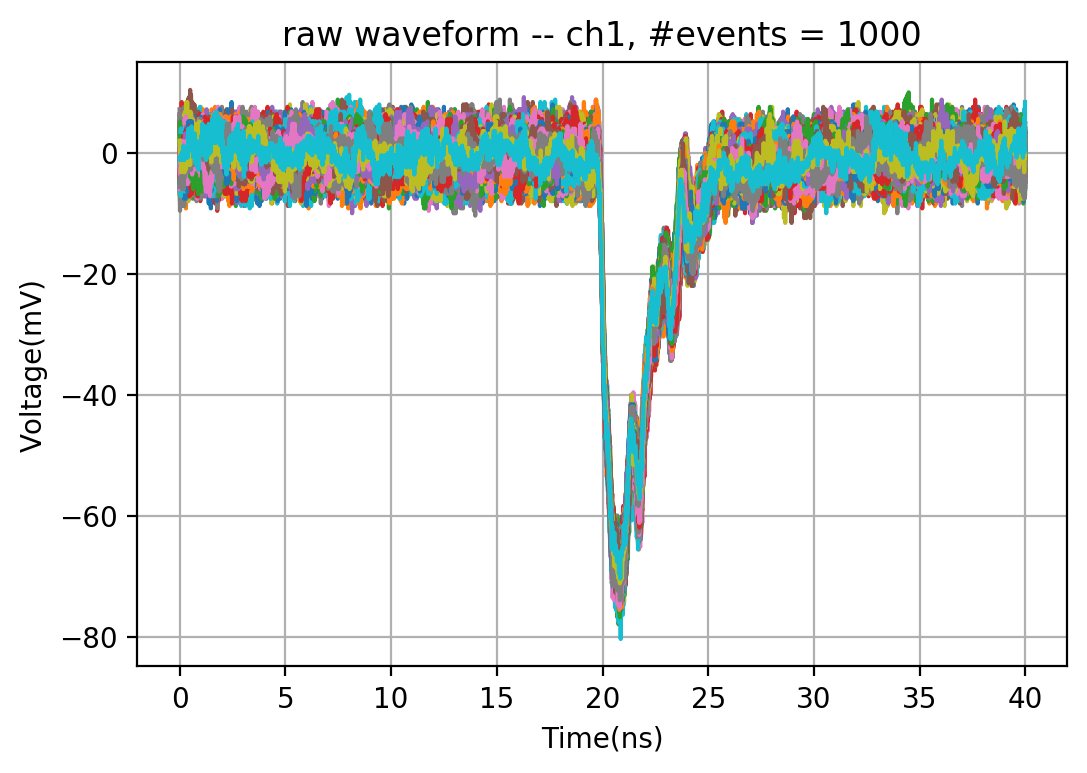

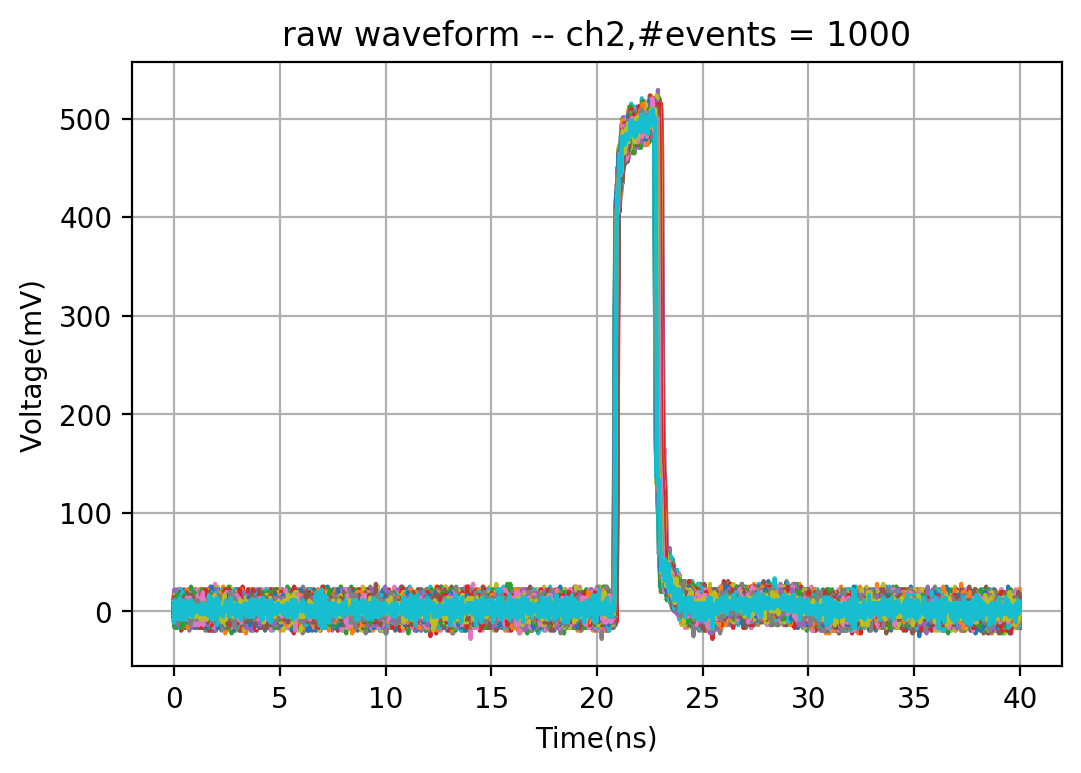

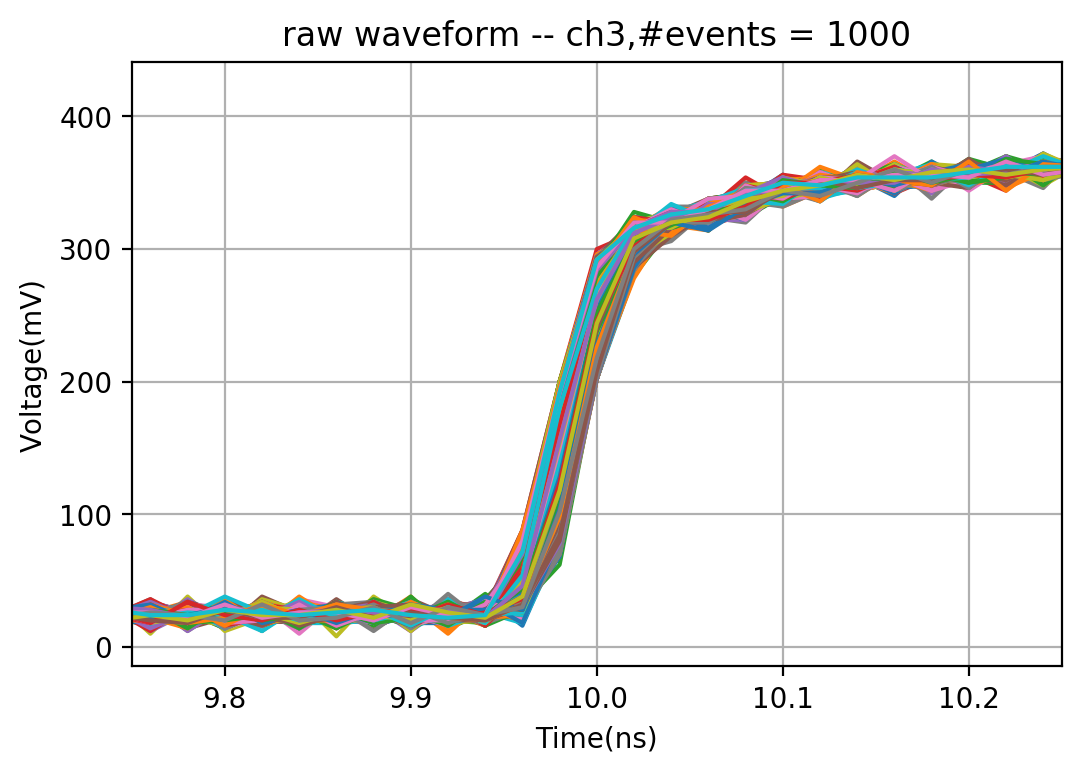

In [2]:
########## ETROC0 batch1 board1 ######################
textstr = '\n'.join((
    '-- ETROC0 batch1 board1',
    '-- baseline = DAC207',
    '-- high power, default gain'))
path ="../../../CMS ETL ASIC/ETROC0/test results/FNAL_Test/202006_ETROC0/"
file_in = 'Discriminator_DGHP/4fC/DGHP_DAC331_4fC_0.hdf5'
# file_in = 'DGDP/30fC/DGDP_DAC216_30fC_0.hdf5'
# file_in = 'DGDP/4fC/DGDP_DAC228_4fC_0.hdf5'

tdc_bin = 10e-3

################## check waveform  #######################

file = path + file_in

data, attrs = etroc0_benchtest.extract_dataset(file)
events_t = attrs['readout_size']
npoints = attrs['nPt']
x = np.arange(npoints)
dt = attrs['dt']

filelist = []
filelist_to_use = [file_in]
for apath in filelist_to_use:
    if apath.find(".hdf5") > -1:
        filelist.append(os.path.join(path,apath))
y_ch1 = []
y_ch2 = []
y_ch3 = []
y_ch4 = []
for item in tqdm(filelist):
    data, attrs = etroc0_benchtest.extract_dataset(item)
    for event in range(len(data[0])):
        y_ch1.append(data[0][event])
    for event in range(len(data[1])):
        y_ch2.append(data[1][event])
    for event in range(len(data[2])):
        y_ch3.append(data[2][event])
    for event in range(len(data[3])):
        y_ch4.append(data[3][event])

events_ch1 = len(y_ch1)
events_ch2 = len(y_ch2)
events_ch3 = len(y_ch3)
events_ch4 = len(y_ch4)
events_t = events_ch1
time = x*dt*1e9




# plt.plot(y_ch1[2109])
print('npoints is',npoints)
print('events_t is',events_t)

# events_t = events_t - 2500
# events_t = events_t - 990


######### Plot signal with points ch1  ###########
fig, ax1 = plt.subplots(dpi=200)
for ab in range(0,events_t):
    ax1.plot(time, y_ch1[ab]*1000)
# ax1.set_xlim(left=15,right=25)
ax1.grid()
ax1.set(xlabel='Time(ns)', ylabel='Voltage(mV)',
       title='raw waveform -- ch1, #events = %d'%(events_t))
# pp.savefig(fig)
plt.show()


######### Plot signal with points ch2  ###########
fig, ax2 = plt.subplots(dpi=200)
for ab in range(0,events_t):
    ax2.plot(time, y_ch2[ab]*1000)
# ax2.set_xlim(left=15,right=20)
ax2.grid()
ax2.set(xlabel='Time(ns)', ylabel='Voltage(mV)',
       title='raw waveform -- ch2,#events = %d'%(events_t))
# pp.savefig(fig)
plt.show()

######### Plot signal with points ch3  ###########
fig, ax3 = plt.subplots(dpi=200)
for ab in range(0,events_t):
    ax3.plot(time, y_ch3[ab]*1000)
ax3.set_xlim(left=9.75,right=10.25)
ax3.grid()
ax3.set(xlabel='Time(ns)', ylabel='Voltage(mV)',
       title='raw waveform -- ch3,#events = %d'%(events_t))
# pp.savefig(fig)
plt.show()

# ######### Plot signal with points ch4  ###########
# fig, ax4 = plt.subplots(dpi=200)
# for ab in range(0,events_t):
#     ax4.plot(time, y_ch4[ab]*1000)
# # ax2.set_xlim(left=60,right=80)
# ax4.grid()
# ax4.set(xlabel='Time(ns)', ylabel='Voltage(mV)',
#        title='raw waveform -- ch4,#events = %d'%(events_t))
# # pp.savefig(fig)
# plt.show()

# plt.close(fig)



In [3]:
########################################## DAC 322 #################################
filelist = [
    'Discriminator_DGHP/3fC/DGHP_DAC322_3fC_0.hdf5',
    'Discriminator_DGHP/4fC/DGHP_DAC322_4fC_0.hdf5',
    'Discriminator_DGHP/5fC/DGHP_DAC322_5fC_0.hdf5',
    'Discriminator_DGHP/6fC/DGHP_DAC322_6fC_0.hdf5',
    'Discriminator_DGHP/8fC/DGHP_DAC322_8fC_0.hdf5',
    'Discriminator_DGHP/10fC/DGHP_DAC322_10fC_0.hdf5',
    'Discriminator_DGHP/12fC/DGHP_DAC322_12fC_0.hdf5',
    'Discriminator_DGHP/15fC/DGHP_DAC322_15fC_0.hdf5',
    'Discriminator_DGHP/20fC/DGHP_DAC322_20fC_0.hdf5',
    'Discriminator_DGHP/30fC/DGHP_DAC322_30fC_0.hdf5'
]

charge_DAC322_list = [3, 4, 5, 6, 8, 10, 12, 15, 20, 30]

# filelist = [
#     'DGDP/4fC/DGDP_DAC222_4fC_0.hdf5',
#     'DGDP/5fC/DGDP_DAC222_5fC_0.hdf5'
# ]

file_num = len(filelist)

print('file_num is', file_num)


t_trigger_DAC322_list = []
mean_t_trigger_DAC322_list = []
std_t_trigger_DAC322_list = []
t_pa_DAC322_list = []
mean_t_pa_DAC322_list = []
std_t_pa_DAC322_list = []
t_discri_le_DAC322_list = []
mean_t_discri_le_DAC322_list = []
std_t_discri_le_DAC322_list = []
t_discri_te_DAC322_list = []
mean_t_discri_te_DAC322_list = []
std_t_discri_te_DAC322_list = []
t_discri_le_notrig_DAC322_list = []
mean_t_discri_le_notrig_DAC322_list = []
std_t_discri_le_notrig_DAC322_list = []
t_discri_te_notrig_DAC322_list = []
mean_t_discri_te_notrig_DAC322_list = []
std_t_discri_te_notrig_DAC322_list = []
ampl_ch1_DAC322_list = []
mean_ampl_DAC322_list = []
std_ampl_DAC322_list = []
q_ch1_DAC322_list = []
mean_q_DAC322_list = []
std_q_DAC322_list = []

for item in tqdm(filelist):
    file_in = item
    charge_size = item.split('_')[2]
    DAC = item.split('_')[1]
    (t_trigger, mean_t_trigger, std_t_trigger, 
    t_pa, mean_t_pa, std_t_pa, 
    t_discri_le, mean_t_discri_le, std_t_discri_le, 
    t_discri_te, mean_t_discri_te, std_t_discri_te, 
    t_discri_le_notrig, mean_t_discri_le_notrig, std_t_discri_le_notrig, 
    t_discri_te_notrig, mean_t_discri_te_notrig, std_t_discri_te_notrig,
    ampl_ch1, mean_ampl, std_ampl,
    q_ch1, mean_q, std_q) = etroc0_benchtest.analyze_single_charge(
        hdf5_in=file_in, path=path, charge_size=charge_size, DAC=DAC, tdc_bin=tdc_bin, transCond = 4.4e3, 
        tdc_start_trigger=9.8, tdc_start_pa=18, tdc_le_start=20, tdc_te_start=30)
    
    t_trigger_DAC322_list.append(t_trigger)
    mean_t_trigger_DAC322_list.append(mean_t_trigger)
    std_t_trigger_DAC322_list.append(std_t_trigger*1000)
    t_pa_DAC322_list.append(t_pa)
    mean_t_pa_DAC322_list.append(mean_t_pa)
    std_t_pa_DAC322_list.append(std_t_pa*1000)
    t_discri_le_DAC322_list.append(t_discri_le)
    mean_t_discri_le_DAC322_list.append(mean_t_discri_le)
    std_t_discri_le_DAC322_list.append(std_t_discri_le*1000)
    t_discri_te_DAC322_list.append(t_discri_te)
    mean_t_discri_te_DAC322_list.append(mean_t_discri_te)
    std_t_discri_te_DAC322_list.append(std_t_discri_te*1000)
    t_discri_le_notrig_DAC322_list.append(t_discri_le_notrig)
    mean_t_discri_le_notrig_DAC322_list.append(mean_t_discri_le_notrig)
    std_t_discri_le_notrig_DAC322_list.append(std_t_discri_le_notrig*1000)
    t_discri_te_notrig_DAC322_list.append(t_discri_te_notrig)
    mean_t_discri_te_notrig_DAC322_list.append(mean_t_discri_te_notrig)
    std_t_discri_te_notrig_DAC322_list.append(std_t_discri_te_notrig*1000)
    ampl_ch1_DAC322_list.append(ampl_ch1)
    mean_ampl_DAC322_list.append(mean_ampl)
    std_ampl_DAC322_list.append(std_ampl)
    q_ch1_DAC322_list.append(q_ch1)
    mean_q_DAC322_list.append(mean_q)
    std_q_DAC322_list.append(std_q)

print('*****************************************************************************************')
print('*****************************************************************************************')
print('*****************************************************************************************')
print('std_t_pa_DAC322_list is\n',std_t_pa_DAC322_list)
print('*****************************************************************************************')
print('std_t_discri_le_notrig_DAC322_list is\n',std_t_discri_le_notrig_DAC322_list)
print('*****************************************************************************************')
print('std_t_discri_te_notrig_DAC322_list is\n', std_t_discri_te_notrig_DAC322_list)
print('*****************************************************************************************')
print('mean_ampl_DAC322_list is\n', mean_ampl_DAC322_list)
print('*****************************************************************************************')
print('mean_q_DAC322_list is\n', mean_q_DAC322_list)

file_num is 10



npoints at DAC322 / DGHP/3fC/DGHP is 2000
events_t is 1000
threshold of trigger is 0.1552
trigger crossing searching is done
trigger mean is 9.996490000000001 ns
trigger std is 0.005931264620635174 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 20.129660000000005 ns
PA std is 0.03280982170021637 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.85422 ns
discriminator leading std is 0.03339448457455189 ns
discriminator trailing mean is 23.158449999999995 ns
discriminator trailing std is 0.08003435199962582 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.857730000000002 ns
discriminator t_le std (trigger removed) is 0.032829058774201635 ns
discriminator t_te mean (trigger remo


npoints at DAC322 / DGHP/4fC/DGHP is 2000
events_t is 1000
threshold of trigger is 0.199
trigger crossing searching is done
trigger mean is 9.99466 ns
trigger std is 0.005374420899036357 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 20.044270000000004 ns
PA std is 0.014528148539989228 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.68475 ns
discriminator leading std is 0.023202101197951647 ns
discriminator trailing mean is 23.727119999999996 ns
discriminator trailing std is 0.11288093550285638 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.690090000000001 ns
discriminator t_le std (trigger removed) is 0.02289742125218448 ns
discriminator t_te mean (trigger removed) is 13


npoints at DAC322 / DGHP/5fC/DGHP is 2000
events_t is 1000
threshold of trigger is 0.25079999999999997
trigger crossing searching is done
trigger mean is 9.99506 ns
trigger std is 0.004999639987038959 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 20.00713 ns
PA std is 0.011595822523650181 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.5931 ns
discriminator leading std is 0.01782105496316051 ns
discriminator trailing mean is 24.152759999999994 ns
discriminator trailing std is 0.09082721178149211 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.598040000000001 ns
discriminator t_le std (trigger removed) is 0.016998776426554608 ns
discriminator t_te mean (trigger removed) is


npoints at DAC322 / DGHP/6fC/DGHP is 2000
events_t is 1000
threshold of trigger is 0.312
trigger crossing searching is done
trigger mean is 9.996109999999998 ns
trigger std is 0.005930252945701262 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 19.985000000000003 ns
PA std is 0.010770329614268695 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.533399999999997 ns
discriminator leading std is 0.016094719630984227 ns
discriminator trailing mean is 24.437259999999995 ns
discriminator trailing std is 0.09113996050032071 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.537290000000002 ns
discriminator t_le std (trigger removed) is 0.015104830353234368 ns
discriminator t_te mean (t


npoints at DAC322 / DGHP/8fC/DGHP is 2000
events_t is 1000
threshold of trigger is 0.406
trigger crossing searching is done
trigger mean is 9.995230000000001 ns
trigger std is 0.005286501678804122 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 19.956190000000003 ns
PA std is 0.010138239492140383 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.466269999999998 ns
discriminator leading std is 0.012805744804579114 ns
discriminator trailing mean is 24.832309999999993 ns
discriminator trailing std is 0.08304555316210502 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.47104 ns
discriminator t_le std (trigger removed) is 0.011845606780574983 ns
discriminator t_te mean (trigger rem


npoints at DAC322 / DGHP/10fC/DGHP is 2000
events_t is 1000
threshold of trigger is 0.505
trigger crossing searching is done
trigger mean is 9.995119999999998 ns
trigger std is 0.005058221031153039 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 19.938209999999998 ns
PA std is 0.010241869946450608 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.42247 ns
discriminator leading std is 0.011687561764542435 ns
discriminator trailing mean is 25.071739999999995 ns
discriminator trailing std is 0.07302309497686345 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.427350000000002 ns
discriminator t_le std (trigger removed) is 0.010948858387977956 ns
discriminator t_te mean (trigger re


npoints at DAC322 / DGHP/12fC/DGHP is 2000
events_t is 1000
threshold of trigger is 0.606
trigger crossing searching is done
trigger mean is 9.99524 ns
trigger std is 0.0051324847783504315 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 19.92629 ns
PA std is 0.009804891636322356 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.39643 ns
discriminator leading std is 0.011285171686775305 ns
discriminator trailing mean is 25.235799999999994 ns
discriminator trailing std is 0.06538623708396141 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.40119 ns
discriminator t_le std (trigger removed) is 0.010133306469262422 ns
discriminator t_te mean (trigger removed) is 15.240559999999995 


npoints at DAC322 / DGHP/15fC/DGHP is 2000
events_t is 1000
threshold of trigger is 0.756
trigger crossing searching is done
trigger mean is 9.9958 ns
trigger std is 0.005249761899362563 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 19.912050000000004 ns
PA std is 0.011049773753340316 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.370480000000004 ns
discriminator leading std is 0.010390842121791482 ns
discriminator trailing mean is 25.386689999999994 ns
discriminator trailing std is 0.057999516377294134 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.37468 ns
discriminator t_le std (trigger removed) is 0.009060772593989831 ns
discriminator t_te mean (trigger removed) is 


npoints at DAC322 / DGHP/20fC/DGHP is 2000
events_t is 1000
threshold of trigger is 0.9199999999999999
trigger crossing searching is done
trigger mean is 9.99184 ns
trigger std is 0.0069003188332132865 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 19.90219 ns
PA std is 0.011300615027510494 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.339980000000004 ns
discriminator leading std is 0.00974677382522056 ns
discriminator trailing mean is 25.49956999999999 ns
discriminator trailing std is 0.05809401948565807 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.348140000000003 ns
discriminator t_le std (trigger removed) is 0.00857556995190424 ns
discriminator t_te mean (trigger r


npoints at DAC322 / DGHP/30fC/DGHP is 2000
events_t is 1000
threshold of trigger is 0.43
trigger crossing searching is done
trigger mean is 9.99577 ns
trigger std is 0.005657481771954607 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 20.042990000000007 ns
PA std is 0.40698717412223256 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.60697 ns
discriminator leading std is 0.009429692465822792 ns
discriminator trailing mean is 25.961719999999993 ns
discriminator trailing std is 0.04789197845151113 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.6112 ns
discriminator t_le std (trigger removed) is 0.008059776671843757 ns
discriminator t_te mean (trigger removed) is 15.9659499999

In [4]:
########################################## DAC 326 #################################
filelist = [
    'Discriminator_DGHP/3fC/DGHP_DAC326_3fC_0.hdf5',
    'Discriminator_DGHP/4fC/DGHP_DAC326_4fC_0.hdf5',
    'Discriminator_DGHP/5fC/DGHP_DAC326_5fC_0.hdf5',
    'Discriminator_DGHP/6fC/DGHP_DAC326_6fC_0.hdf5',
    'Discriminator_DGHP/8fC/DGHP_DAC326_8fC_0.hdf5',
    'Discriminator_DGHP/10fC/DGHP_DAC326_10fC_0.hdf5',
    'Discriminator_DGHP/12fC/DGHP_DAC326_12fC_0.hdf5',
    'Discriminator_DGHP/15fC/DGHP_DAC326_15fC_0.hdf5',
    'Discriminator_DGHP/20fC/DGHP_DAC326_20fC_0.hdf5',
    'Discriminator_DGHP/30fC/DGHP_DAC326_30fC_0.hdf5'
]

charge_DAC326_list = [3, 4, 5, 6, 8, 10, 12, 15, 20, 30]

# filelist = [
#     'DGDP/4fC/DGDP_DAC326_4fC_0.hdf5',
#     'DGDP/5fC/DGDP_DAC326_5fC_0.hdf5'
# ]

file_num = len(filelist)

print('file_num is', file_num)


t_trigger_DAC326_list = []
mean_t_trigger_DAC326_list = []
std_t_trigger_DAC326_list = []
t_pa_DAC326_list = []
mean_t_pa_DAC326_list = []
std_t_pa_DAC326_list = []
t_discri_le_DAC326_list = []
mean_t_discri_le_DAC326_list = []
std_t_discri_le_DAC326_list = []
t_discri_te_DAC326_list = []
mean_t_discri_te_DAC326_list = []
std_t_discri_te_DAC326_list = []
t_discri_le_notrig_DAC326_list = []
mean_t_discri_le_notrig_DAC326_list = []
std_t_discri_le_notrig_DAC326_list = []
t_discri_te_notrig_DAC326_list = []
mean_t_discri_te_notrig_DAC326_list = []
std_t_discri_te_notrig_DAC326_list = []
ampl_ch1_DAC326_list = []
mean_ampl_DAC326_list = []
std_ampl_DAC326_list = []
q_ch1_DAC326_list = []
mean_q_DAC326_list = []
std_q_DAC326_list = []

for item in tqdm(filelist):
    file_in = item
    charge_size = item.split('_')[2]
    DAC = item.split('_')[1]
    (t_trigger, mean_t_trigger, std_t_trigger, 
    t_pa, mean_t_pa, std_t_pa, 
    t_discri_le, mean_t_discri_le, std_t_discri_le, 
    t_discri_te, mean_t_discri_te, std_t_discri_te, 
    t_discri_le_notrig, mean_t_discri_le_notrig, std_t_discri_le_notrig, 
    t_discri_te_notrig, mean_t_discri_te_notrig, std_t_discri_te_notrig,
    ampl_ch1, mean_ampl, std_ampl,
    q_ch1, mean_q, std_q) = etroc0_benchtest.analyze_single_charge(
        hdf5_in=file_in, path=path, charge_size=charge_size, DAC=DAC, tdc_bin=tdc_bin, transCond = 4.4e3, 
        tdc_start_trigger=9.8, tdc_start_pa=18, tdc_le_start=20, tdc_te_start=30)
    
    t_trigger_DAC326_list.append(t_trigger)
    mean_t_trigger_DAC326_list.append(mean_t_trigger)
    std_t_trigger_DAC326_list.append(std_t_trigger*1000)
    t_pa_DAC326_list.append(t_pa)
    mean_t_pa_DAC326_list.append(mean_t_pa)
    std_t_pa_DAC326_list.append(std_t_pa*1000)
    t_discri_le_DAC326_list.append(t_discri_le)
    mean_t_discri_le_DAC326_list.append(mean_t_discri_le)
    std_t_discri_le_DAC326_list.append(std_t_discri_le*1000)
    t_discri_te_DAC326_list.append(t_discri_te)
    mean_t_discri_te_DAC326_list.append(mean_t_discri_te)
    std_t_discri_te_DAC326_list.append(std_t_discri_te*1000)
    t_discri_le_notrig_DAC326_list.append(t_discri_le_notrig)
    mean_t_discri_le_notrig_DAC326_list.append(mean_t_discri_le_notrig)
    std_t_discri_le_notrig_DAC326_list.append(std_t_discri_le_notrig*1000)
    t_discri_te_notrig_DAC326_list.append(t_discri_te_notrig)
    mean_t_discri_te_notrig_DAC326_list.append(mean_t_discri_te_notrig)
    std_t_discri_te_notrig_DAC326_list.append(std_t_discri_te_notrig*1000)
    ampl_ch1_DAC326_list.append(ampl_ch1)
    mean_ampl_DAC326_list.append(mean_ampl)
    std_ampl_DAC326_list.append(std_ampl)
    q_ch1_DAC326_list.append(q_ch1)
    mean_q_DAC326_list.append(mean_q)
    std_q_DAC326_list.append(std_q)

print('*****************************************************************************************')
print('*****************************************************************************************')
print('*****************************************************************************************')
print('std_t_pa_DAC326_list is\n',std_t_pa_DAC326_list)
print('*****************************************************************************************')
print('std_t_discri_le_notrig_DAC326_list is\n',std_t_discri_le_notrig_DAC326_list)
print('*****************************************************************************************')
print('std_t_discri_te_notrig_DAC326_list is\n', std_t_discri_te_notrig_DAC326_list)
print('*****************************************************************************************')
print('mean_ampl_DAC326_list is\n', mean_ampl_DAC326_list)
print('*****************************************************************************************')
print('mean_q_DAC326_list is\n', mean_q_DAC326_list)

file_num is 10



npoints at DAC326 / DGHP/3fC/DGHP is 2000
events_t is 1000
threshold of trigger is 0.15280000000000002
trigger crossing searching is done
trigger mean is 9.99552 ns
trigger std is 0.005615122438558099 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 20.128770000000003 ns
PA std is 0.03537777692280828 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 21.015 ns
discriminator leading std is 0.042365079959796936 ns
discriminator trailing mean is 22.761329999999994 ns
discriminator trailing std is 0.09123777233141994 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 11.019480000000001 ns
discriminator t_le std (trigger removed) is 0.0422223826897534 ns
discriminator t_te mean (trigger remo


npoints at DAC326 / DGHP/4fC/DGHP is 2000
events_t is 1000
threshold of trigger is 0.2
trigger crossing searching is done
trigger mean is 9.994780000000002 ns
trigger std is 0.005267978739516592 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 20.043680000000002 ns
PA std is 0.01498190909063295 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.78179 ns
discriminator leading std is 0.02294549846919907 ns
discriminator trailing mean is 23.259609999999995 ns
discriminator trailing std is 0.06857220938543551 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.787010000000002 ns
discriminator t_le std (trigger removed) is 0.02233741032438667 ns
discriminator t_te mean (trigger removed)


npoints at DAC326 / DGHP/5fC/DGHP is 2000
events_t is 1000
threshold of trigger is 0.2472
trigger crossing searching is done
trigger mean is 9.994720000000001 ns
trigger std is 0.0055246357345981375 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 20.007489999999997 ns
PA std is 0.011593097084040695 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.666230000000002 ns
discriminator leading std is 0.018140757977549053 ns
discriminator trailing mean is 23.687039999999993 ns
discriminator trailing std is 0.08307008125673172 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.671510000000001 ns
discriminator t_le std (trigger removed) is 0.017338393812577003 ns
discriminator t_te mean 


npoints at DAC326 / DGHP/6fC/DGHP is 2000
events_t is 1000
threshold of trigger is 0.3056
trigger crossing searching is done
trigger mean is 9.995330000000001 ns
trigger std is 0.005356407378084566 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 19.984440000000006 ns
PA std is 0.010596527733177222 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.59348 ns
discriminator leading std is 0.015319582239734559 ns
discriminator trailing mean is 24.028259999999996 ns
discriminator trailing std is 0.08119096255125945 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.598150000000002 ns
discriminator t_le std (trigger removed) is 0.014438749945891834 ns
discriminator t_te mean (trigger re


npoints at DAC326 / DGHP/8fC/DGHP is 2000
events_t is 1000
threshold of trigger is 0.404
trigger crossing searching is done
trigger mean is 9.99521 ns
trigger std is 0.005133799762359151 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 19.95662 ns
PA std is 0.009714710494914193 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.51353 ns
discriminator leading std is 0.012411248929902117 ns
discriminator trailing mean is 24.453979999999994 ns
discriminator trailing std is 0.07318852095786599 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.518320000000003 ns
discriminator t_le std (trigger removed) is 0.011312718506176883 ns
discriminator t_te mean (trigger removed) is 14.45876999


npoints at DAC326 / DGHP/10fC/DGHP is 2000
events_t is 1000
threshold of trigger is 0.5025000000000001
trigger crossing searching is done
trigger mean is 9.99521 ns
trigger std is 0.004995588053472678 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 19.938620000000004 ns
PA std is 0.0102905587797752 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.461729999999996 ns
discriminator leading std is 0.010766015976209457 ns
discriminator trailing mean is 24.744639999999997 ns
discriminator trailing std is 0.06742010382667785 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.466520000000001 ns
discriminator t_le std (trigger removed) is 0.009648295186197305 ns
discriminator t_te mean 


npoints at DAC326 / DGHP/12fC/DGHP is 2000
events_t is 1000
threshold of trigger is 0.609
trigger crossing searching is done
trigger mean is 9.99546 ns
trigger std is 0.005346812134346856 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 19.926030000000004 ns
PA std is 0.009640492725998125 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.431540000000002 ns
discriminator leading std is 0.010612652825754484 ns
discriminator trailing mean is 24.940609999999996 ns
discriminator trailing std is 0.06029202186027602 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.43608 ns
discriminator t_le std (trigger removed) is 0.009068274367265029 ns
discriminator t_te mean (trigger removed) is 


npoints at DAC326 / DGHP/15fC/DGHP is 2000
events_t is 1000
threshold of trigger is 0.744
trigger crossing searching is done
trigger mean is 9.995130000000001 ns
trigger std is 0.005232886392804532 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 19.911720000000006 ns
PA std is 0.010423128129309648 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.401840000000004 ns
discriminator leading std is 0.009592413669144774 ns
discriminator trailing mean is 25.128659999999996 ns
discriminator trailing std is 0.05339479749938172 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.406709999999999 ns
discriminator t_le std (trigger removed) is 0.00831119125035615 ns
discriminator t_te mean (t


npoints at DAC326 / DGHP/20fC/DGHP is 2000
events_t is 1000
threshold of trigger is 0.9149999999999999
trigger crossing searching is done
trigger mean is 9.99178 ns
trigger std is 0.006944897407449439 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 19.90286 ns
PA std is 0.011279202099439377 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.369600000000002 ns
discriminator leading std is 0.009297311439335371 ns
discriminator trailing mean is 25.252919999999996 ns
discriminator trailing std is 0.04930794662120892 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.37782 ns
discriminator t_le std (trigger removed) is 0.007552986164425122 ns
discriminator t_te mean (trigger removed) 


npoints at DAC326 / DGHP/30fC/DGHP is 2000
events_t is 1000
threshold of trigger is 0.426
trigger crossing searching is done
trigger mean is 9.995479999999999 ns
trigger std is 0.005307504121524429 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 20.012940000000004 ns
PA std is 0.4564701046070822 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.633129999999998 ns
discriminator leading std is 0.009061076095034537 ns
discriminator trailing mean is 25.762269999999997 ns
discriminator trailing std is 0.04004181689184405 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.637649999999997 ns
discriminator t_le std (trigger removed) is 0.007319665292894463 ns
discriminator t_te mean (tr

In [5]:
########################################## DAC 331 #################################
filelist = [
    'Discriminator_DGHP/4fC/DGHP_DAC331_4fC_0.hdf5',
    'Discriminator_DGHP/5fC/DGHP_DAC331_5fC_0.hdf5',
    'Discriminator_DGHP/6fC/DGHP_DAC331_6fC_0.hdf5',
    'Discriminator_DGHP/8fC/DGHP_DAC331_8fC_0.hdf5',
    'Discriminator_DGHP/10fC/DGHP_DAC331_10fC_0.hdf5',
    'Discriminator_DGHP/12fC/DGHP_DAC331_12fC_0.hdf5',
    'Discriminator_DGHP/15fC/DGHP_DAC331_15fC_0.hdf5',
    'Discriminator_DGHP/20fC/DGHP_DAC331_20fC_0.hdf5',
    'Discriminator_DGHP/30fC/DGHP_DAC331_30fC_0.hdf5'
]

charge_DAC331_list = [4, 5, 6, 8, 10, 12, 15, 20, 30]

# filelist = [
#     'DGDP/4fC/DGDP_DAC331_5fC_0.hdf5',
#     'DGDP/5fC/DGDP_DAC331_6fC_0.hdf5'
# ]

file_num = len(filelist)

print('file_num is', file_num)


t_trigger_DAC331_list = []
mean_t_trigger_DAC331_list = []
std_t_trigger_DAC331_list = []
t_pa_DAC331_list = []
mean_t_pa_DAC331_list = []
std_t_pa_DAC331_list = []
t_discri_le_DAC331_list = []
mean_t_discri_le_DAC331_list = []
std_t_discri_le_DAC331_list = []
t_discri_te_DAC331_list = []
mean_t_discri_te_DAC331_list = []
std_t_discri_te_DAC331_list = []
t_discri_le_notrig_DAC331_list = []
mean_t_discri_le_notrig_DAC331_list = []
std_t_discri_le_notrig_DAC331_list = []
t_discri_te_notrig_DAC331_list = []
mean_t_discri_te_notrig_DAC331_list = []
std_t_discri_te_notrig_DAC331_list = []
ampl_ch1_DAC331_list = []
mean_ampl_DAC331_list = []
std_ampl_DAC331_list = []
q_ch1_DAC331_list = []
mean_q_DAC331_list = []
std_q_DAC331_list = []

for item in tqdm(filelist):
    file_in = item
    charge_size = item.split('_')[2]
    DAC = item.split('_')[1]
    (t_trigger, mean_t_trigger, std_t_trigger, 
    t_pa, mean_t_pa, std_t_pa, 
    t_discri_le, mean_t_discri_le, std_t_discri_le, 
    t_discri_te, mean_t_discri_te, std_t_discri_te, 
    t_discri_le_notrig, mean_t_discri_le_notrig, std_t_discri_le_notrig, 
    t_discri_te_notrig, mean_t_discri_te_notrig, std_t_discri_te_notrig,
    ampl_ch1, mean_ampl, std_ampl,
    q_ch1, mean_q, std_q) = etroc0_benchtest.analyze_single_charge(
        hdf5_in=file_in, path=path, charge_size=charge_size, DAC=DAC, tdc_bin=tdc_bin, transCond = 4.4e3, 
        tdc_start_trigger=9.8, tdc_start_pa=18, tdc_le_start=20, tdc_te_start=30)
    
    t_trigger_DAC331_list.append(t_trigger)
    mean_t_trigger_DAC331_list.append(mean_t_trigger)
    std_t_trigger_DAC331_list.append(std_t_trigger*1000)
    t_pa_DAC331_list.append(t_pa)
    mean_t_pa_DAC331_list.append(mean_t_pa)
    std_t_pa_DAC331_list.append(std_t_pa*1000)
    t_discri_le_DAC331_list.append(t_discri_le)
    mean_t_discri_le_DAC331_list.append(mean_t_discri_le)
    std_t_discri_le_DAC331_list.append(std_t_discri_le*1000)
    t_discri_te_DAC331_list.append(t_discri_te)
    mean_t_discri_te_DAC331_list.append(mean_t_discri_te)
    std_t_discri_te_DAC331_list.append(std_t_discri_te*1000)
    t_discri_le_notrig_DAC331_list.append(t_discri_le_notrig)
    mean_t_discri_le_notrig_DAC331_list.append(mean_t_discri_le_notrig)
    std_t_discri_le_notrig_DAC331_list.append(std_t_discri_le_notrig*1000)
    t_discri_te_notrig_DAC331_list.append(t_discri_te_notrig)
    mean_t_discri_te_notrig_DAC331_list.append(mean_t_discri_te_notrig)
    std_t_discri_te_notrig_DAC331_list.append(std_t_discri_te_notrig*1000)
    ampl_ch1_DAC331_list.append(ampl_ch1)
    mean_ampl_DAC331_list.append(mean_ampl)
    std_ampl_DAC331_list.append(std_ampl)
    q_ch1_DAC331_list.append(q_ch1)
    mean_q_DAC331_list.append(mean_q)
    std_q_DAC331_list.append(std_q)

print('*****************************************************************************************')
print('*****************************************************************************************')
print('*****************************************************************************************')
print('std_t_pa_DAC331_list is\n',std_t_pa_DAC331_list)
print('*****************************************************************************************')
print('std_t_discri_le_notrig_DAC331_list is\n',std_t_discri_le_notrig_DAC331_list)
print('*****************************************************************************************')
print('std_t_discri_te_notrig_DAC331_list is\n', std_t_discri_te_notrig_DAC331_list)
print('*****************************************************************************************')
print('mean_ampl_DAC331_list is\n', mean_ampl_DAC331_list)
print('*****************************************************************************************')
print('mean_q_DAC331_list is\n', mean_q_DAC331_list)

file_num is 9



npoints at DAC331 / DGHP/4fC/DGHP is 2000
events_t is 1000
threshold of trigger is 0.199
trigger crossing searching is done
trigger mean is 9.994830000000002 ns
trigger std is 0.005174079628300946 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 20.044610000000002 ns
PA std is 0.01472575634729818 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.916220000000003 ns
discriminator leading std is 0.027675107949202 ns
discriminator trailing mean is 22.912419999999994 ns
discriminator trailing std is 0.05631645940575462 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.921389999999999 ns
discriminator t_le std (trigger removed) is 0.027043814449888248 ns
discriminator t_te mean (trigg


npoints at DAC331 / DGHP/5fC/DGHP is 2000
events_t is 1000
threshold of trigger is 0.25079999999999997
trigger crossing searching is done
trigger mean is 9.995220000000002 ns
trigger std is 0.004995157655169547 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 20.00806 ns
PA std is 0.011757397671253335 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.75768 ns
discriminator leading std is 0.018788762598957606 ns
discriminator trailing mean is 23.246739999999992 ns
discriminator trailing std is 0.05677475143054364 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.76246 ns
discriminator t_le std (trigger removed) is 0.01792619312626049 ns
discriminator t_te mean (trigger removed) i


npoints at DAC331 / DGHP/6fC/DGHP is 2000
events_t is 1000
threshold of trigger is 0.304
trigger crossing searching is done
trigger mean is 9.995130000000001 ns
trigger std is 0.005057973902660917 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 19.984250000000007 ns
PA std is 0.010818387125629799 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.666380000000004 ns
discriminator leading std is 0.015162308531355183 ns
discriminator trailing mean is 23.563879999999994 ns
discriminator trailing std is 0.06780077875658967 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.671250000000002 ns
discriminator t_le std (trigger removed) is 0.014097428843587246 ns
discriminator t_te mean (t


npoints at DAC331 / DGHP/8fC/DGHP is 2000
events_t is 1000
threshold of trigger is 0.406
trigger crossing searching is done
trigger mean is 9.995310000000002 ns
trigger std is 0.0051481938580437 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 19.9566 ns
PA std is 0.009728309205612025 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.56803 ns
discriminator leading std is 0.012522743309674343 ns
discriminator trailing mean is 24.057799999999997 ns
discriminator trailing std is 0.062144669924298575 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.57272 ns
discriminator t_le std (trigger removed) is 0.01168766871535956 ns
discriminator t_te mean (trigger removed) is 14.06248999999


npoints at DAC331 / DGHP/10fC/DGHP is 2000
events_t is 1000
threshold of trigger is 0.505
trigger crossing searching is done
trigger mean is 9.99512 ns
trigger std is 0.005058221031153038 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 19.937540000000002 ns
PA std is 0.01063712367136955 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.50549 ns
discriminator leading std is 0.010777750229059893 ns
discriminator trailing mean is 24.373339999999992 ns
discriminator trailing std is 0.05927094060330086 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.510370000000002 ns
discriminator t_le std (trigger removed) is 0.009714067119389288 ns
discriminator t_te mean (trigger removed) is 1


npoints at DAC331 / DGHP/12fC/DGHP is 2000
events_t is 1000
threshold of trigger is 0.609
trigger crossing searching is done
trigger mean is 9.995529999999999 ns
trigger std is 0.005321569317409931 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 19.92573 ns
PA std is 0.009615981489168068 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.46971 ns
discriminator leading std is 0.00961331888579607 ns
discriminator trailing mean is 24.595069999999993 ns
discriminator trailing std is 0.05602495069163388 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.47418 ns
discriminator t_le std (trigger removed) is 0.008278139887680211 ns
discriminator t_te mean (trigger removed) is 14.59953999


npoints at DAC331 / DGHP/15fC/DGHP is 2000
events_t is 1000
threshold of trigger is 0.752
trigger crossing searching is done
trigger mean is 9.995479999999999 ns
trigger std is 0.005115623129199305 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 19.912340000000004 ns
PA std is 0.011168007879653745 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.43518 ns
discriminator leading std is 0.009379104434859216 ns
discriminator trailing mean is 24.831889999999994 ns
discriminator trailing std is 0.05016899341226607 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.4397 ns
discriminator t_le std (trigger removed) is 0.007918964578781542 ns
discriminator t_te mean (trigger removed) is 1


npoints at DAC331 / DGHP/20fC/DGHP is 2000
events_t is 1000
threshold of trigger is 0.9199999999999999
trigger crossing searching is done
trigger mean is 9.99223 ns
trigger std is 0.00677695359287623 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 19.90283 ns
PA std is 0.011148591839330998 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.398490000000002 ns
discriminator leading std is 0.008521731044805227 ns
discriminator trailing mean is 24.998369999999994 ns
discriminator trailing std is 0.04178328732878743 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.406259999999998 ns
discriminator t_le std (trigger removed) is 0.006972259318183533 ns
discriminator t_te mean (trigger 


npoints at DAC331 / DGHP/30fC/DGHP is 2000
events_t is 1000
threshold of trigger is 0.426
trigger crossing searching is done
trigger mean is 9.9952 ns
trigger std is 0.005268775948927684 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 20.003230000000002 ns
PA std is 0.46498738380734655 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.659330000000004 ns
discriminator leading std is 0.008345723455758739 ns
discriminator trailing mean is 25.545869999999994 ns
discriminator trailing std is 0.03645604339475166 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.664130000000004 ns
discriminator t_le std (trigger removed) is 0.0065607240454085 ns
discriminator t_te mean (trigger remove

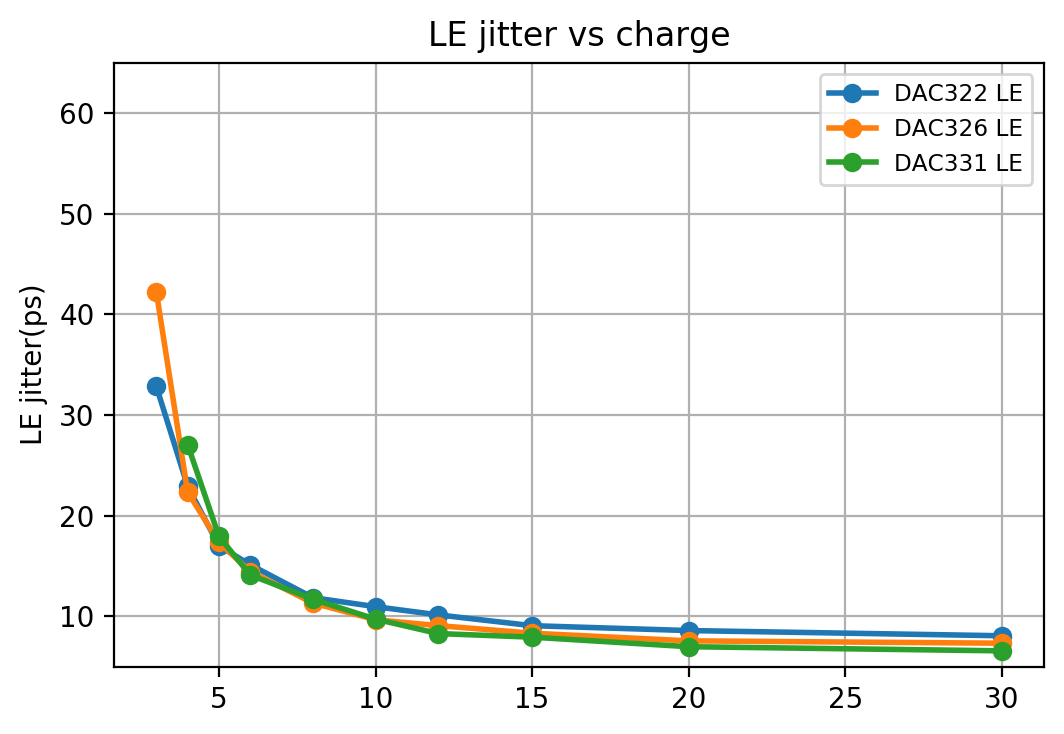

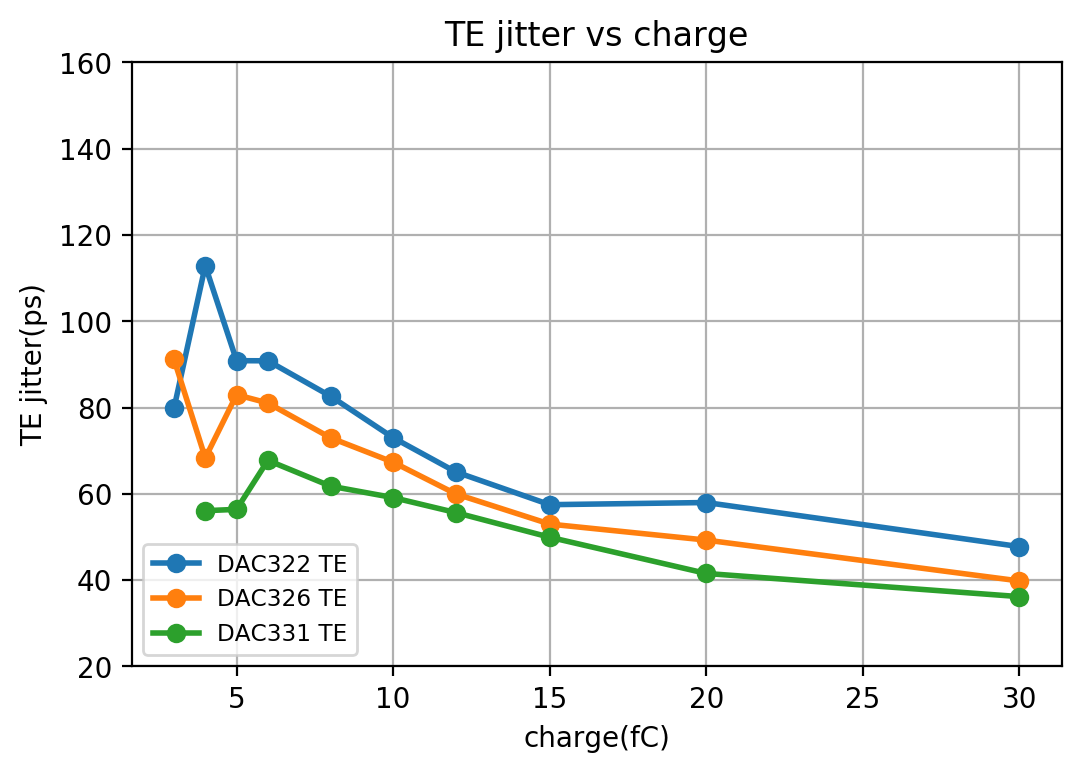

In [12]:
############## plot  ###############
# charge_DAC322_list = [3, 4, 5, 6, 8, 10, 12, 15, 20, 30]
# charge_DAC326_list = [3, 4, 5, 6, 8, 10, 12, 15, 20, 30]
# charge_DAC331_list = [4, 5, 6, 8, 10, 12, 15, 20, 30]
# std_t_discri_le_notrig_DAC322_list = [55.081312393576745, 33.5965400004161, 26.05374253345816, 
#                                       22.5273605866244, 18.81562582004275, 16.048937659543025, 
#                                       14.973709460247598, 12.898332256533537, 11.479982578381783, 11.415248573725846]
# std_t_discri_le_notrig_DAC326_list = [42.264784099759545, 28.33616770136146, 21.60300904966283, 
#                                       16.700071856129487, 13.96251768127515, 12.108030393087999, 
#                                       11.495519779459704, 9.761443284676796, 8.225442237349645]
# std_t_discri_le_notrig_DAC331_list = [39.770094292060314, 25.770479234964462, 17.58708617138944, 
#                                       12.937893955351925, 11.500642373361078, 9.781051835051402, 
#                                       8.127113571248723, 6.910352740633446]


fig1,ax1 = plt.subplots(dpi=200)
ax1.plot(charge_DAC322_list, std_t_discri_le_notrig_DAC322_list, 'o-', linewidth=2,  label="DAC322 LE")
ax1.plot(charge_DAC326_list, std_t_discri_le_notrig_DAC326_list, 'o-', linewidth=2,  label="DAC326 LE")
ax1.plot(charge_DAC331_list, std_t_discri_le_notrig_DAC331_list, 'o-', linewidth=2,  label="DAC331 LE")

ax1.set(ylabel='LE jitter(ps)',
       title='LE jitter vs charge')

ax1.set_ylim(bottom=5,top=65)
ax1.grid(which='both')
ax1.legend(loc = 'upper right', fontsize = 'small')
plt.show()

fig2,ax2 = plt.subplots(dpi=200)
ax2.plot(charge_DAC322_list, std_t_discri_te_notrig_DAC322_list, 'o-', linewidth=2,  label="DAC322 TE")
ax2.plot(charge_DAC326_list, std_t_discri_te_notrig_DAC326_list, 'o-', linewidth=2,  label="DAC326 TE")
ax2.plot(charge_DAC331_list, std_t_discri_te_notrig_DAC331_list, 'o-', linewidth=2,  label="DAC331 TE")
ax2.set_ylim(bottom=20,top=160)
ax2.set(xlabel='charge(fC)', ylabel='TE jitter(ps)',
       title='TE jitter vs charge')
ax2.grid(which='both')
ax2.legend(loc = 'lower left', fontsize = 'small')
plt.show()




In [7]:
plot_detail=False

if plot_detail==True:

    ############################### plot  ######################################
    # path_plot = './'
    # pp = PdfPages(path_plot+"plots_DGDP"+".pdf")
    
    
    # plot_details = False
    plot_details = True
    
    charge_list = [3, 4, 5, 6, 8, 10, 12, 15, 20, 30]
    q_ideal_list = [3, 4, 5, 6, 8, 10, 12, 15, 20, 30]
    
    # ######### plot text box #####
    # fig0, ax0 = plt.subplots(dpi=200)
    # props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    # ax0.text(0.05, 0.95, textstr, transform=ax0.transAxes, fontsize=12,
    #         verticalalignment='top', bbox=props)
    # ax0.set_xlim(left=0,right=50)
    # ax0.set_ylim(bottom=0,top=50)
    # plt.show()
    # plt.close(fig0)
    
    ######### plot measured charge vs input charge  ######
    fig1, ax1 = plt.subplots(dpi=200)
    ax1.plot(charge_DAC322_list, mean_q_DAC216_list, 'o', label = 'DAC322 Charge')
    ax1.plot(charge_DAC322_list, q_ideal_list, 'o', label = 'input charge')
    # ax1.plot(charge_DAC222_list, mean_q_DAC222_list, 'o', label = 'DAC222 Charge')
    # ax1.plot(charge_DAC228_list, mean_q_DAC228_list, 'o', label = 'DAC228 Charge')
    ax1.set(xlabel='charge in(fC)', ylabel='charge measured(fC)',
           title='measured charge vs input charge')
    ax1.legend(loc = 'upper left', fontsize = 'small')
    ax1.grid(which='both')
    plt.show()
    plt.close(fig1)
    
    
    if plot_details == True:
        #### plot charge  ###########
        for index in range(0, len(charge_DAC322_list)):
            etroc0_benchtest.plot_distribution_charge_gaus(q_ch1_DAC322_list[index], file_item='test file', 
                                                   num_bins= 30, range_default = None, xaxis = 'Charge (fC)',
                                                      ylable = 'Occurrence', title = str(charge_DAC216_list[index])+'fC', 
                                                           pic = True, pdf = False)
    
    if plot_details == True:
        ###### plot trigger timing #############
        for index in range(0, len(charge_list)):
            etroc0_benchtest.plot_distribution_time(t_trigger_DAC322_list[index], file_item='test file', 
                                                    num_bins= 30, range_default = None, xaxis = 'Time Resolution(ns)',
                                                    ylable = 'Occurrence', title = 'Trigger Jitter at '+ str(charge_list[index]) + 'fC', 
                                                    pic = True, pdf = False)
    
    if plot_details == True:
        ###### plot discri timing #########
        for index in range(0, len(charge_DAC216_list)):
            etroc0_benchtest.plot_distribution_time(t_discri_le_notrig_DAC322_list[index], file_item='test file', 
                                                    num_bins= 10, range_default = None, xaxis = 'Time Resolution(ns)', 
                                                    ylable = 'Occurrence', 
                                                    title = 'Discri LE jitter at '+ str(charge_DAC216_list[index]) + 'fC' + '/DAC216', 
                                                    pic = True, pdf = False)
            etroc0_benchtest.plot_distribution_time(t_discri_te_notrig_DAC322_list[index], file_item='test file', 
                                                    num_bins= 10, range_default = None, xaxis = 'Time Resolution(ns)', 
                                                    ylable = 'Occurrence', 
                                                    title = 'Discri TE jitter at '+ str(charge_DAC322_list[index]) + 'fC' + '/DAC216', 
                                                    pic = True, pdf = False)
        for index in range(0, len(charge_DAC326_list)):
            etroc0_benchtest.plot_distribution_time(t_discri_le_notrig_DAC326_list[index], file_item='test file', 
                                                    num_bins= 10, range_default = None, xaxis = 'Time Resolution(ns)', 
                                                    ylable = 'Occurrence', 
                                                    title = 'Discri LE jitter at '+ str(charge_DAC222_list[index]) + 'fC' + '/DAC222', 
                                                    pic = True, pdf = False)
            etroc0_benchtest.plot_distribution_time(t_discri_te_notrig_DAC326_list[index], file_item='test file', 
                                                    num_bins= 10, range_default = None, xaxis = 'Time Resolution(ns)', 
                                                    ylable = 'Occurrence', 
                                                    title = 'Discri TE jitter at '+ str(charge_DAC222_list[index]) + 'fC' + '/DAC222', 
                                                    pic = True, pdf = False)
        for index in range(0, len(charge_DAC331_list)):
            etroc0_benchtest.plot_distribution_time(t_discri_le_notrig_DAC331_list[index], file_item='test file', 
                                                    num_bins= 10, range_default = None, xaxis = 'Time Resolution(ns)', 
                                                    ylable = 'Occurrence', 
                                                    title = 'Discri LE jitter at '+ str(charge_DAC228_list[index]) + 'fC' + '/DAC228', 
                                                    pic = True, pdf = False)
            etroc0_benchtest.plot_distribution_time(t_discri_te_notrig_DAC331_list[index], file_item='test file', 
                                                    num_bins= 10, range_default = None, xaxis = 'Time Resolution(ns)', 
                                                    ylable = 'Occurrence', 
                                                    title = 'Discri TE jitter at '+ str(charge_DAC228_list[index]) + 'fC' + '/DAC228', 
                                                    pic = True, pdf = False)
            
    
    # pp.close()
else:
    print('plot_detail is disabled')

plot_detail is disabled


length of DAC322 list is 10
9000
1.8419999999999908
5.537999999999994


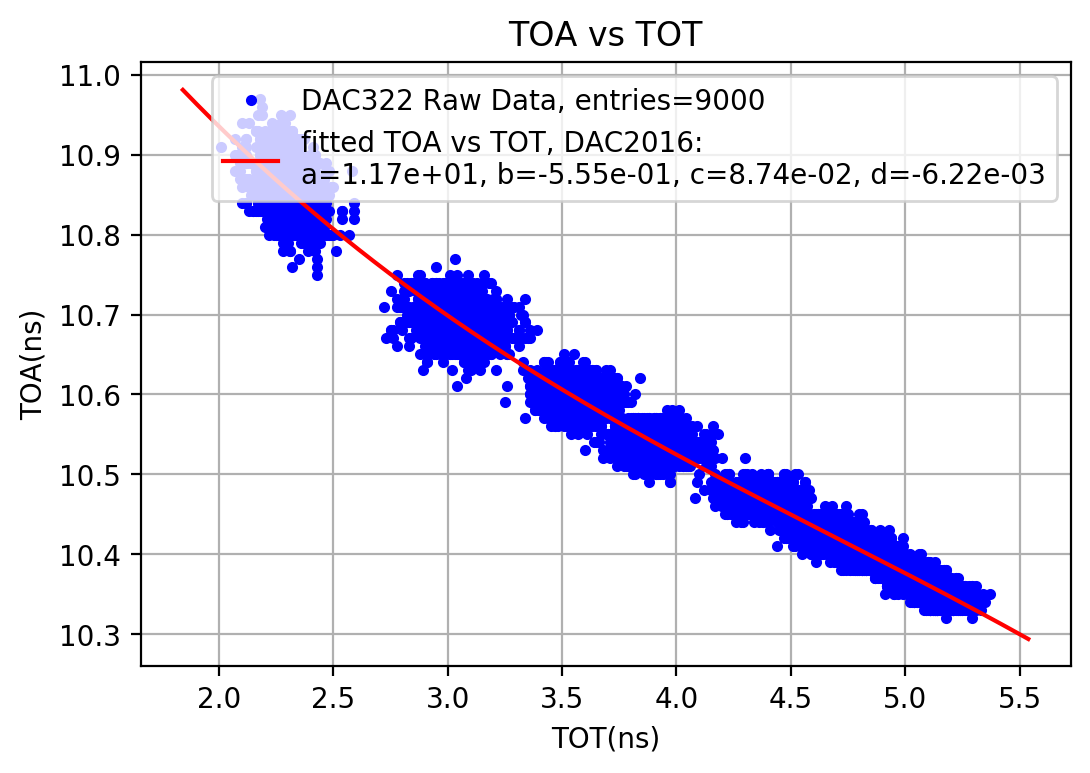

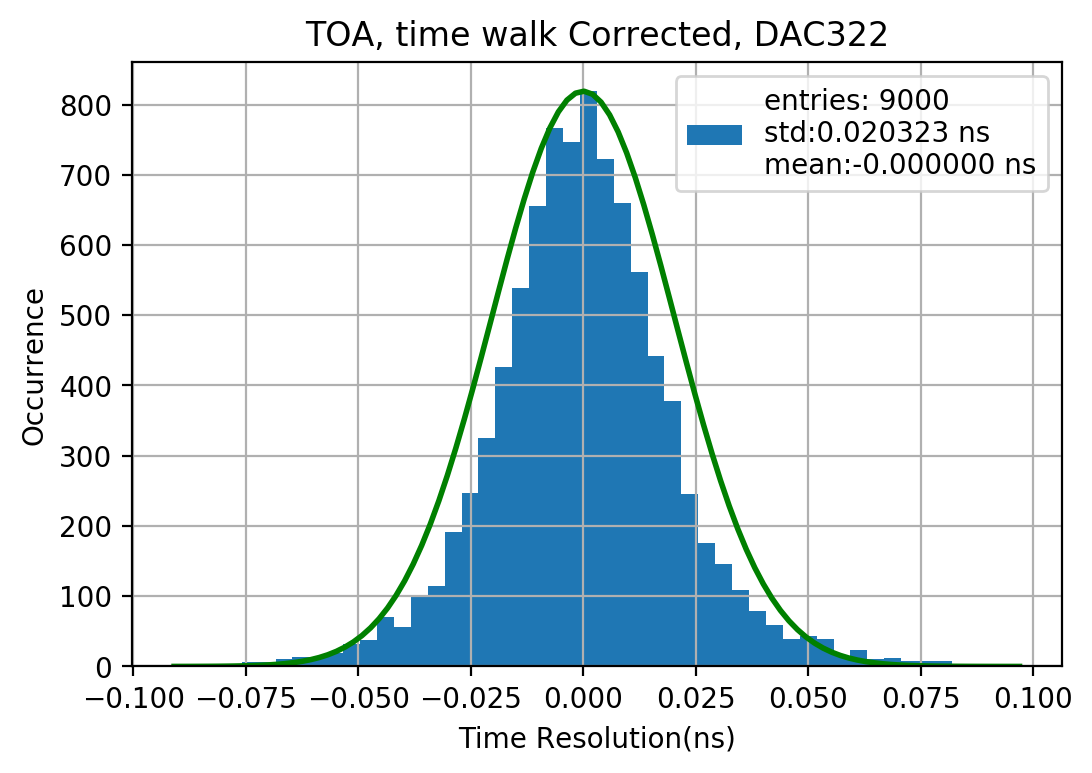

1.8419999999999908
5.537999999999994


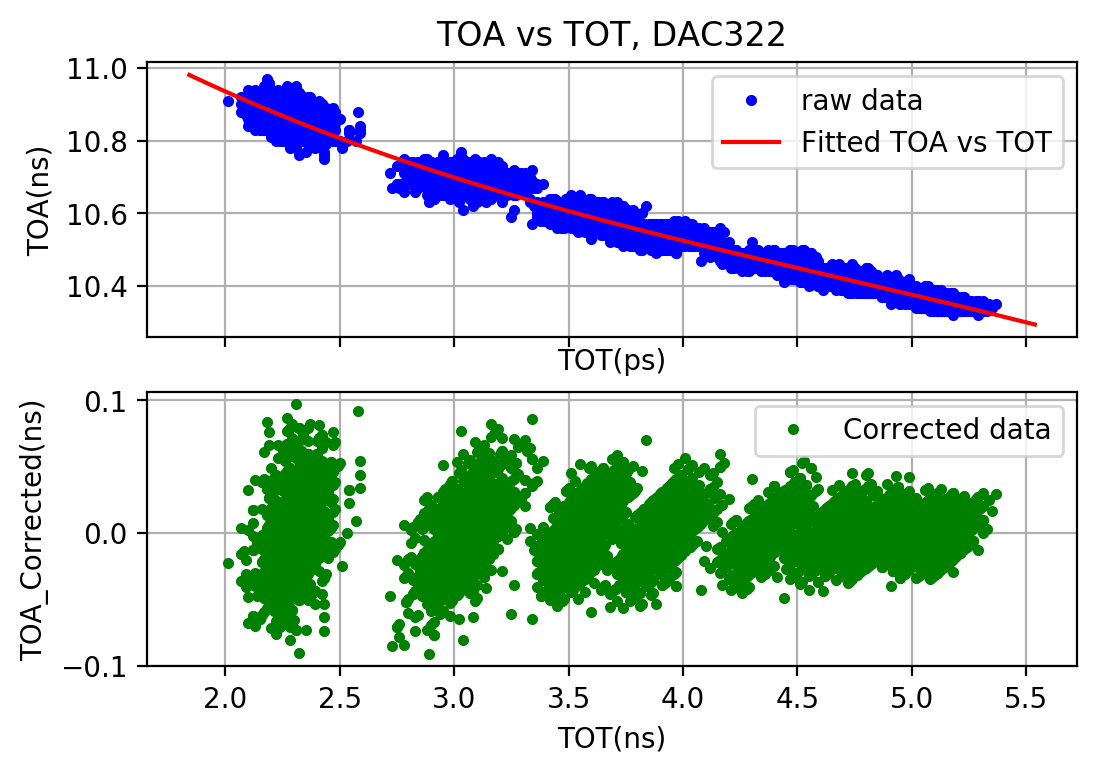

In [8]:
polynomial_4th = True
# polynomial_4th = False

# LindseyFit = True
LindseyFit = False
# SciFit = True       #scipy fitting with normal distribution
SciFit = False      #scipy unbiased standard deviation

############### Time Walk Calibration  DAC322 ##################

length_DAC322_le = len(t_discri_le_notrig_DAC322_list)
print('length of DAC322 list is', length_DAC322_le)

le_DAC322 = t_discri_le_notrig_DAC322_list[0] + t_discri_le_notrig_DAC322_list[1] + \
                t_discri_le_notrig_DAC322_list[2] + t_discri_le_notrig_DAC322_list[3] + \
                t_discri_le_notrig_DAC322_list[4] + t_discri_le_notrig_DAC322_list[5] + \
                t_discri_le_notrig_DAC322_list[6] + t_discri_le_notrig_DAC322_list[7] + \
                t_discri_le_notrig_DAC322_list[8]
te_DAC322 = t_discri_te_notrig_DAC322_list[0] + t_discri_te_notrig_DAC322_list[1] + \
                t_discri_te_notrig_DAC322_list[2] + t_discri_te_notrig_DAC322_list[3] + \
                t_discri_te_notrig_DAC322_list[4] + t_discri_te_notrig_DAC322_list[5] + \
                t_discri_te_notrig_DAC322_list[6] + t_discri_te_notrig_DAC322_list[7] + \
                t_discri_te_notrig_DAC322_list[8]

print(len(te_DAC322))

le_DAC322 = np.array(le_DAC322)
te_DAC322 = np.array(te_DAC322)

length_DAC322 = len(te_DAC322)

tot_DAC322 = te_DAC322 - le_DAC322

if polynomial_4th == True:
    popt_toa_DAC322, pcov_toa_DAC322 = curve_fit(etroc0_benchtest.func1, tot_DAC322, le_DAC322)
else:
    popt_toa_DAC322, pcov_toa_DAC322 = curve_fit(etroc0_benchtest.func0, tot_DAC322, le_DAC322)



fig1,ax1 = plt.subplots(dpi=200)
ax1.plot(tot_DAC322, le_DAC322, 'b.', label='DAC322 Raw Data, entries=%d'%(length_DAC322))

#print fit
xmin, xmax = plt.xlim()
xtot = np.linspace(xmin, xmax, 1000)
print(xmin)
print(xmax)
if polynomial_4th == True:
    ax1.plot(xtot, etroc0_benchtest.func1(xtot, *popt_toa_DAC322), 'r-', 
         label='fitted TOA vs TOT, DAC2016: \na=%5.2e, b=%5.2e, c=%5.2e, d=%5.2e' % tuple(popt_toa_DAC322))
else:
    ax1.plot(xtot, etroc0_benchtest.func0(xtot, *popt_toa_DAC322), 'r-', 
         label='fitted TOA vs TOT, DAC2016: \na=%5.2e, b=%5.2e' % tuple(popt_toa_DAC322))

ax1.set(xlabel='TOT(ns)', ylabel='TOA(ns)',
       title='TOA vs TOT')
# ax1.set_ylim(bottom=3000,top=7000)

ax1.grid()
ax1.legend()
plt.show()


#################################
#time walk correction and fit
#################################



# Generate data 
if polynomial_4th == True:
    toa_DAC322_fitted=etroc0_benchtest.func1(tot_DAC322, *popt_toa_DAC322)
else:
    toa_DAC322_fitted=etroc0_benchtest.func0(tot_DAC322, *popt_toa_DAC322)

toa_DAC322_corrected = le_DAC322 - toa_DAC322_fitted

if LindseyFit == True:
    etroc0_benchtest.plot_distribution_time_Lindsey(toa_DAC322_corrected, 'file_item', num_bins= 50, 
                                        range_default = None, xaxis = 'TOA corrected(ns)',ylable = 'Occurrence', 
                                         title = 'TOA, time walk Corrected, DAC322', pic = True, pdf = False)
else:
    if SciFit == True:
        etroc0_benchtest.plot_distribution_time(toa_DAC322_corrected, 'file_item', num_bins= 50, 
                                        range_default = None, xaxis = 'TOA corrected(ns)',ylable = 'Occurrence', 
                                         title = 'TOA, time walk Corrected, DAC322', pic = True, pdf = False)
    else:
        etroc0_benchtest.plot_distribution_time_nofit(toa_DAC322_corrected, 'file_item', num_bins= 50, 
                                        range_default = None, xaxis = 'TOA corrected(ns)',ylable = 'Occurrence', 
                                         title = 'TOA, time walk Corrected, DAC322', pic = True, pdf = False)


######################## plot demo #################################

#print orginal data
fig5,ax5 = plt.subplots(2,1,sharex=True,dpi=200)
ax5[0].plot(tot_DAC322, le_DAC322, 'b.', label='raw data')


#print fit
xmin, xmax = plt.xlim()
xtot = np.linspace(xmin, xmax, 1000)
print(xmin)
print(xmax)
if polynomial_4th == True:
    ax5[0].plot(xtot, etroc0_benchtest.func1(xtot, *popt_toa_DAC322), 'r-', label='Fitted TOA vs TOT')
else:
    ax5[0].plot(xtot, etroc0_benchtest.func0(xtot, *popt_toa_DAC322), 'r-', label='Fitted TOA vs TOT')



ax5[0].set(xlabel='TOT(ps)', ylabel='TOA(ns)',
       title='TOA vs TOT, DAC322')
ax5[0].grid()
ax5[0].legend()

ax5[1].plot(tot_DAC322, toa_DAC322_corrected,'g.', label='Corrected data')
ax5[1].set(xlabel='TOT(ns)', ylabel='TOA_Corrected(ns)')
# ax5[1].set_ylim(-500, 500)
# ax5[1].hist(toa_DAC322_corrected, orientation='horizontal', density = True)
ax5[1].grid()
ax5[1].legend()

plt.show()

length of DAC326 list is 10
8000
1.1294999999999877
5.100499999999995


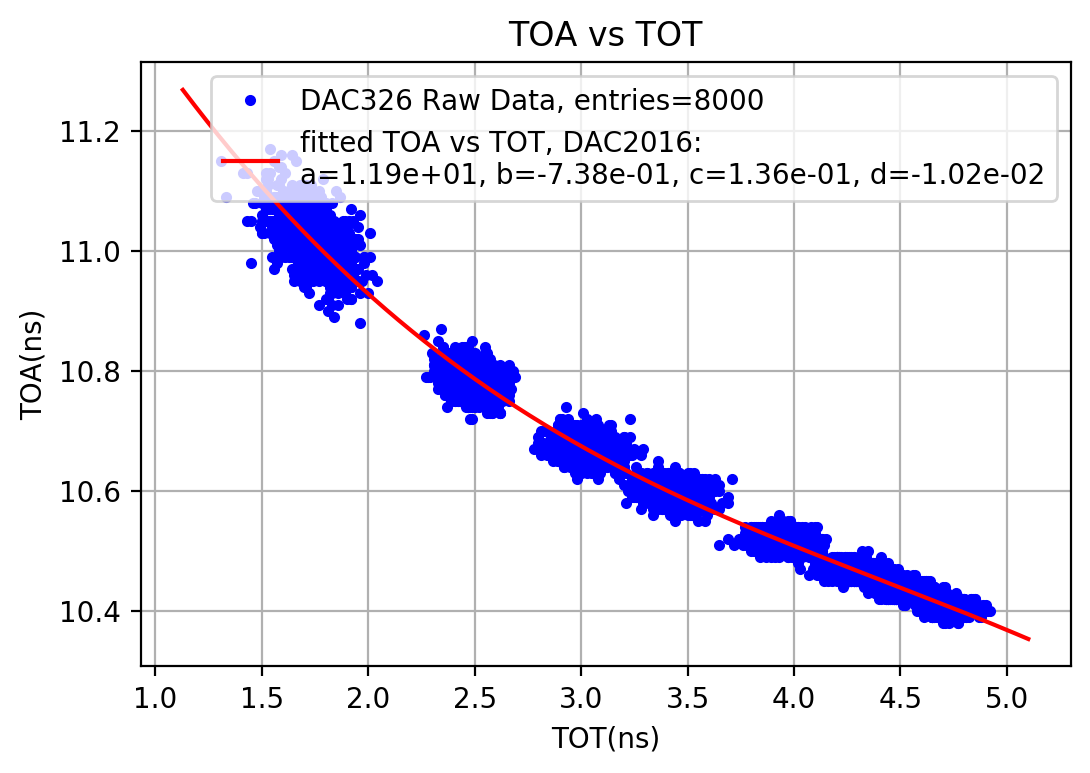

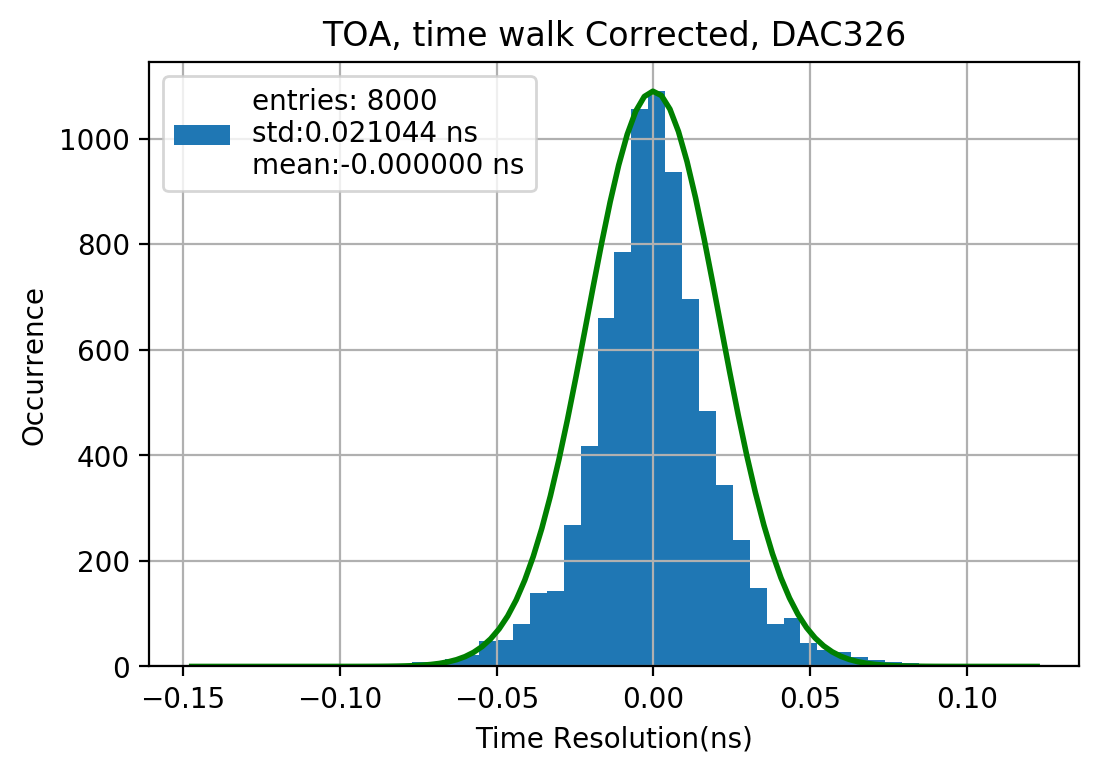

1.1294999999999877
5.100499999999995


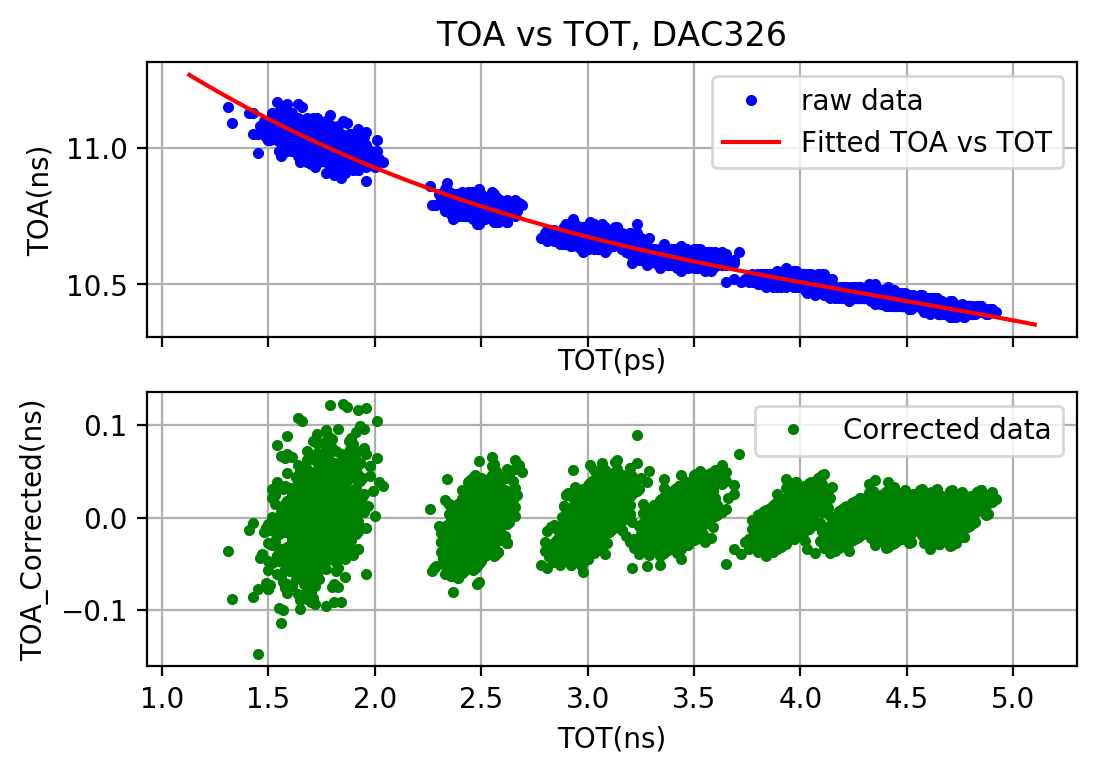

In [9]:
polynomial_4th = True
# polynomial_4th = False

# LindseyFit = True
LindseyFit = False
# SciFit = True       #scipy fitting with normal distribution
SciFit = False      #scipy unbiased standard deviation

############### Time Walk Calibration  DAC326 ##################

length_DAC326_le = len(t_discri_le_notrig_DAC326_list)
print('length of DAC326 list is', length_DAC326_le)

le_DAC326 = t_discri_le_notrig_DAC326_list[0] + t_discri_le_notrig_DAC326_list[1] + \
                t_discri_le_notrig_DAC326_list[2] + t_discri_le_notrig_DAC326_list[3] + \
                t_discri_le_notrig_DAC326_list[4] + t_discri_le_notrig_DAC326_list[5] + \
                t_discri_le_notrig_DAC326_list[6] + t_discri_le_notrig_DAC326_list[7]
te_DAC326 = t_discri_te_notrig_DAC326_list[0] + t_discri_te_notrig_DAC326_list[1] + \
                t_discri_te_notrig_DAC326_list[2] + t_discri_te_notrig_DAC326_list[3] + \
                t_discri_te_notrig_DAC326_list[4] + t_discri_te_notrig_DAC326_list[5] + \
                t_discri_te_notrig_DAC326_list[6] + t_discri_te_notrig_DAC326_list[7] 

print(len(te_DAC326))

le_DAC326 = np.array(le_DAC326)
te_DAC326 = np.array(te_DAC326)

length_DAC326 = len(te_DAC326)

tot_DAC326 = te_DAC326 - le_DAC326

if polynomial_4th == True:
    popt_toa_DAC326, pcov_toa_DAC326 = curve_fit(etroc0_benchtest.func1, tot_DAC326, le_DAC326)
else:
    popt_toa_DAC326, pcov_toa_DAC326 = curve_fit(etroc0_benchtest.func0, tot_DAC326, le_DAC326)



fig1,ax1 = plt.subplots(dpi=200)
ax1.plot(tot_DAC326, le_DAC326, 'b.', label='DAC326 Raw Data, entries=%d'%(length_DAC326))

#print fit
xmin, xmax = plt.xlim()
xtot = np.linspace(xmin, xmax, 1000)
print(xmin)
print(xmax)
if polynomial_4th == True:
    ax1.plot(xtot, etroc0_benchtest.func1(xtot, *popt_toa_DAC326), 'r-', 
         label='fitted TOA vs TOT, DAC2016: \na=%5.2e, b=%5.2e, c=%5.2e, d=%5.2e' % tuple(popt_toa_DAC326))
else:
    ax1.plot(xtot, etroc0_benchtest.func0(xtot, *popt_toa_DAC326), 'r-', 
         label='fitted TOA vs TOT, DAC2016: \na=%5.2e, b=%5.2e' % tuple(popt_toa_DAC326))

ax1.set(xlabel='TOT(ns)', ylabel='TOA(ns)',
       title='TOA vs TOT')
# ax1.set_ylim(bottom=3000,top=7000)

ax1.grid()
ax1.legend()
plt.show()


#################################
#time walk correction and fit
#################################



# Generate data 
if polynomial_4th == True:
    toa_DAC326_fitted=etroc0_benchtest.func1(tot_DAC326, *popt_toa_DAC326)
else:
    toa_DAC326_fitted=etroc0_benchtest.func0(tot_DAC326, *popt_toa_DAC326)

toa_DAC326_corrected = le_DAC326 - toa_DAC326_fitted

if LindseyFit == True:
    etroc0_benchtest.plot_distribution_time_Lindsey(toa_DAC326_corrected, 'file_item', num_bins= 50, 
                                        range_default = None, xaxis = 'TOA corrected(ns)',ylable = 'Occurrence', 
                                         title = 'TOA, time walk Corrected, DAC326', pic = True, pdf = False)
else:
    if SciFit == True:
        etroc0_benchtest.plot_distribution_time(toa_DAC326_corrected, 'file_item', num_bins= 50, 
                                        range_default = None, xaxis = 'TOA corrected(ns)',ylable = 'Occurrence', 
                                         title = 'TOA, time walk Corrected, DAC326', pic = True, pdf = False)
    else:
        etroc0_benchtest.plot_distribution_time_nofit(toa_DAC326_corrected, 'file_item', num_bins= 50, 
                                        range_default = None, xaxis = 'TOA corrected(ns)',ylable = 'Occurrence', 
                                         title = 'TOA, time walk Corrected, DAC326', pic = True, pdf = False)


######################## plot demo #################################

#print orginal data
fig5,ax5 = plt.subplots(2,1,sharex=True,dpi=200)
ax5[0].plot(tot_DAC326, le_DAC326, 'b.', label='raw data')


#print fit
xmin, xmax = plt.xlim()
xtot = np.linspace(xmin, xmax, 1000)
print(xmin)
print(xmax)
if polynomial_4th == True:
    ax5[0].plot(xtot, etroc0_benchtest.func1(xtot, *popt_toa_DAC326), 'r-', label='Fitted TOA vs TOT')
else:
    ax5[0].plot(xtot, etroc0_benchtest.func0(xtot, *popt_toa_DAC326), 'r-', label='Fitted TOA vs TOT')



ax5[0].set(xlabel='TOT(ps)', ylabel='TOA(ns)',
       title='TOA vs TOT, DAC326')
ax5[0].grid()
ax5[0].legend()

ax5[1].plot(tot_DAC326, toa_DAC326_corrected,'g.', label='Corrected data')
ax5[1].set(xlabel='TOT(ns)', ylabel='TOA_Corrected(ns)')
# ax5[1].set_ylim(-500, 500)
# ax5[1].hist(toa_DAC326_corrected, orientation='horizontal', density = True)
ax5[1].grid()
ax5[1].legend()

plt.show()

length of DAC331 list is 9
7000
1.6419999999999901
4.6779999999999955


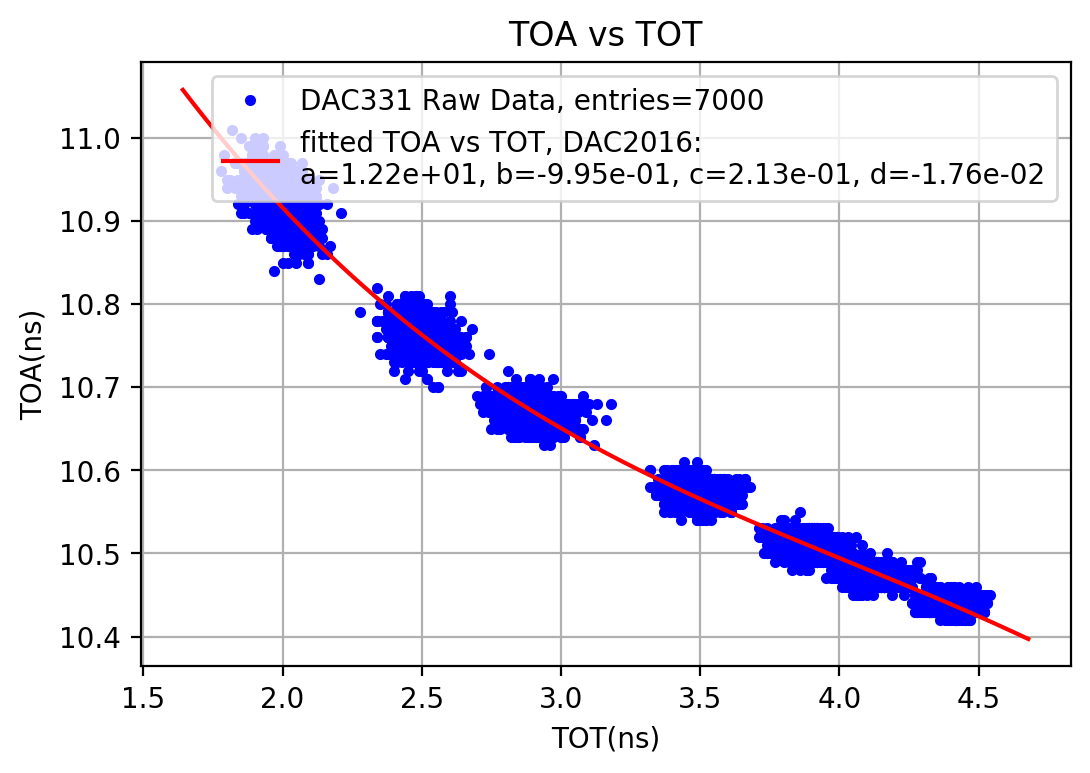

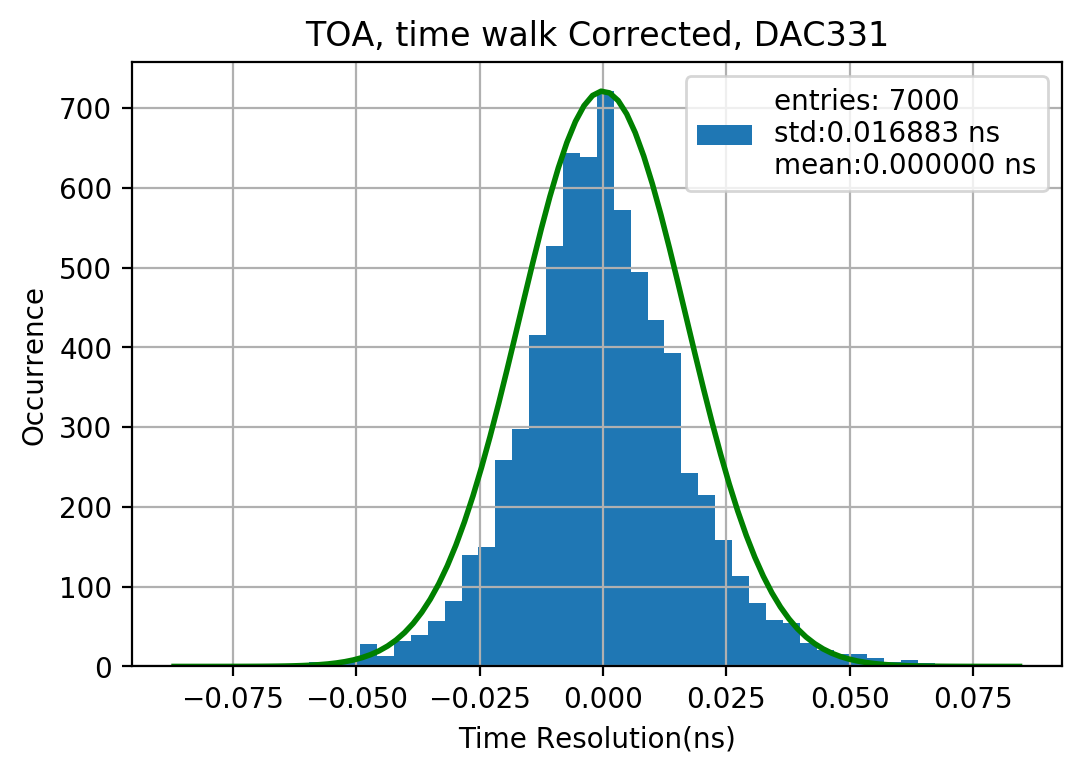

1.6419999999999901
4.6779999999999955


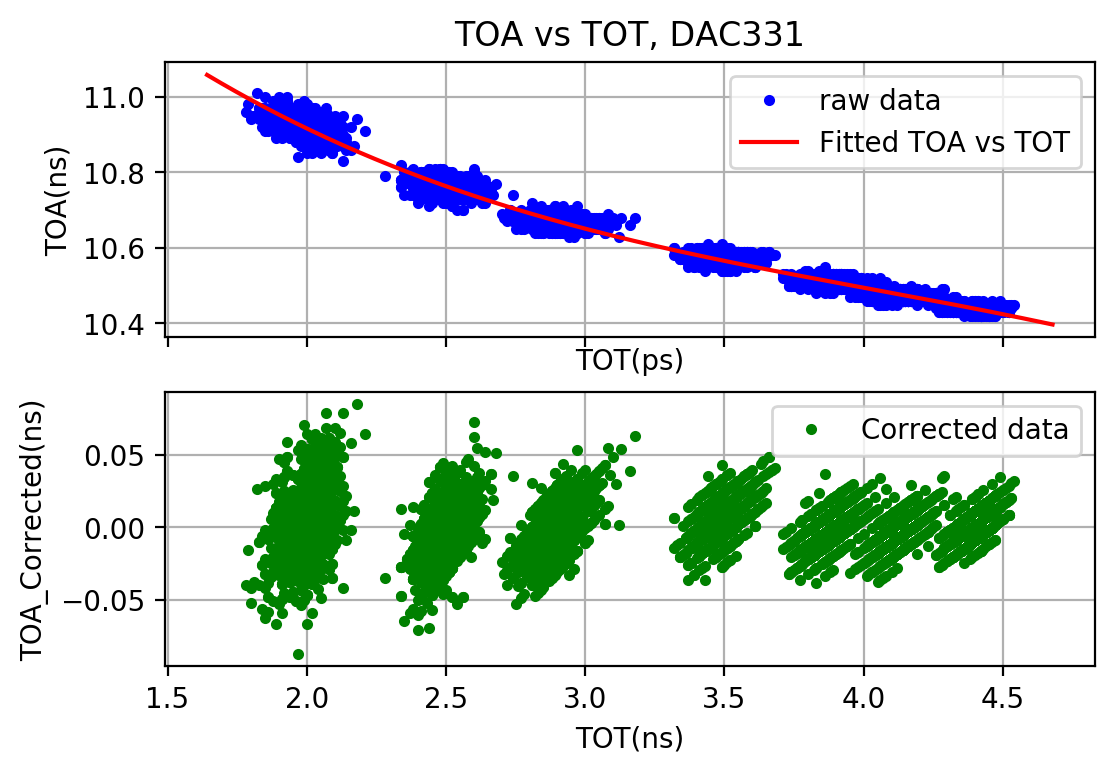

In [10]:
polynomial_4th = True
# polynomial_4th = False

# LindseyFit = True
LindseyFit = False
# SciFit = True       #scipy fitting with normal distribution
SciFit = False      #scipy unbiased standard deviation

############### Time Walk Calibration  DAC331 ##################

length_DAC331_le = len(t_discri_le_notrig_DAC331_list)
print('length of DAC331 list is', length_DAC331_le)

le_DAC331 = t_discri_le_notrig_DAC331_list[0] + t_discri_le_notrig_DAC331_list[1] + \
                t_discri_le_notrig_DAC331_list[2] + t_discri_le_notrig_DAC331_list[3] + \
                t_discri_le_notrig_DAC331_list[4] + t_discri_le_notrig_DAC331_list[5] + \
                t_discri_le_notrig_DAC331_list[6] 
te_DAC331 = t_discri_te_notrig_DAC331_list[0] + t_discri_te_notrig_DAC331_list[1] + \
                t_discri_te_notrig_DAC331_list[2] + t_discri_te_notrig_DAC331_list[3] + \
                t_discri_te_notrig_DAC331_list[4] + t_discri_te_notrig_DAC331_list[5] + \
                t_discri_te_notrig_DAC331_list[6] 

print(len(te_DAC331))

le_DAC331 = np.array(le_DAC331)
te_DAC331 = np.array(te_DAC331)

length_DAC331 = len(te_DAC331)

tot_DAC331 = te_DAC331 - le_DAC331

if polynomial_4th == True:
    popt_toa_DAC331, pcov_toa_DAC331 = curve_fit(etroc0_benchtest.func1, tot_DAC331, le_DAC331)
else:
    popt_toa_DAC331, pcov_toa_DAC331 = curve_fit(etroc0_benchtest.func0, tot_DAC331, le_DAC331)



fig1,ax1 = plt.subplots(dpi=200)
ax1.plot(tot_DAC331, le_DAC331, 'b.', label='DAC331 Raw Data, entries=%d'%(length_DAC331))

#print fit
xmin, xmax = plt.xlim()
xtot = np.linspace(xmin, xmax, 1000)
print(xmin)
print(xmax)
if polynomial_4th == True:
    ax1.plot(xtot, etroc0_benchtest.func1(xtot, *popt_toa_DAC331), 'r-', 
         label='fitted TOA vs TOT, DAC2016: \na=%5.2e, b=%5.2e, c=%5.2e, d=%5.2e' % tuple(popt_toa_DAC331))
else:
    ax1.plot(xtot, etroc0_benchtest.func0(xtot, *popt_toa_DAC331), 'r-', 
         label='fitted TOA vs TOT, DAC2016: \na=%5.2e, b=%5.2e' % tuple(popt_toa_DAC331))

ax1.set(xlabel='TOT(ns)', ylabel='TOA(ns)',
       title='TOA vs TOT')
# ax1.set_ylim(bottom=3000,top=7000)

ax1.grid()
ax1.legend()
plt.show()


#################################
#time walk correction and fit
#################################



# Generate data 
if polynomial_4th == True:
    toa_DAC331_fitted=etroc0_benchtest.func1(tot_DAC331, *popt_toa_DAC331)
else:
    toa_DAC331_fitted=etroc0_benchtest.func0(tot_DAC331, *popt_toa_DAC331)

toa_DAC331_corrected = le_DAC331 - toa_DAC331_fitted

if LindseyFit == True:
    etroc0_benchtest.plot_distribution_time_Lindsey(toa_DAC331_corrected, 'file_item', num_bins= 50, 
                                        range_default = None, xaxis = 'TOA corrected(ns)',ylable = 'Occurrence', 
                                         title = 'TOA, time walk Corrected, DAC331', pic = True, pdf = False)
else:
    if SciFit == True:
        etroc0_benchtest.plot_distribution_time(toa_DAC331_corrected, 'file_item', num_bins= 50, 
                                        range_default = None, xaxis = 'TOA corrected(ns)',ylable = 'Occurrence', 
                                         title = 'TOA, time walk Corrected, DAC331', pic = True, pdf = False)
    else:
        etroc0_benchtest.plot_distribution_time_nofit(toa_DAC331_corrected, 'file_item', num_bins= 50, 
                                        range_default = None, xaxis = 'TOA corrected(ns)',ylable = 'Occurrence', 
                                         title = 'TOA, time walk Corrected, DAC331', pic = True, pdf = False)


######################## plot demo #################################

#print orginal data
fig5,ax5 = plt.subplots(2,1,sharex=True,dpi=200)
ax5[0].plot(tot_DAC331, le_DAC331, 'b.', label='raw data')


#print fit
xmin, xmax = plt.xlim()
xtot = np.linspace(xmin, xmax, 1000)
print(xmin)
print(xmax)
if polynomial_4th == True:
    ax5[0].plot(xtot, etroc0_benchtest.func1(xtot, *popt_toa_DAC331), 'r-', label='Fitted TOA vs TOT')
else:
    ax5[0].plot(xtot, etroc0_benchtest.func0(xtot, *popt_toa_DAC331), 'r-', label='Fitted TOA vs TOT')



ax5[0].set(xlabel='TOT(ps)', ylabel='TOA(ns)',
       title='TOA vs TOT, DAC331')
ax5[0].grid()
ax5[0].legend()

ax5[1].plot(tot_DAC331, toa_DAC331_corrected,'g.', label='Corrected data')
ax5[1].set(xlabel='TOT(ns)', ylabel='TOA_Corrected(ns)')
# ax5[1].set_ylim(-500, 500)
# ax5[1].hist(toa_DAC331_corrected, orientation='horizontal', density = True)
ax5[1].grid()
ax5[1].legend()

plt.show()